# Handwritten Digits Generator With a GAN: https://realpython.com/generative-adversarial-networks/

<span style="font-family:Papyrus; font-size:2.5em;">Generative Adversarial Networks (GANs)</span>
---
![](https://espresso-jobs.com/conseils-carriere/wp-content/uploads/2019/05/monalisa.gif)
<br>

# Introduction

- Generative Adversarial Networks (GANs)
- How GANs Work
- GANs Process
- Examples

### Generative Adversarial Networks (GANs)

Generative Adversarial Networks are used to generate images that never existed before. They learn about the world (objects, animals and so forth) and create new versions of those images that never existed.

They have two components:

- A **Generator** - this creates the images.
- A **Discriminator** - this assesses the images and tells the generator if they are similar to what it has been trained on. These are based off real world examples.

When training the network, both the generator and discriminator start from scratch and learn together.

### How GANs Work


**G** for **Generative** - this is a model that takes an input as a random noise singal and then outputs an image.

![](https://camo.githubusercontent.com/a2c5a0db812c0ade199e5ccacf86c6cff4db1685/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f67656e657261746976652e706e67)

**A** for **Adversarial** - this is the discriminator, the opponent of the generator. This is capable of learning about objects, animals or other features specified. For example: if you supply it with pictures of dogs and non-dogs, it would be able to identify the difference between the two.

![](https://camo.githubusercontent.com/96c8ccb9a91b8789106c1b3dfc9d62dde9d3cbe1/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d6578616d706c652e706e67)

Using this example, once the discriminator has been trained, showing the discriminator a picture that isn't a dog it will return a 0. Whereas, if you show it a dog it will return a 1.

![](https://camo.githubusercontent.com/8b5978b05b5ab4cd9bfba4819a0f0e09a12c8068/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d73636f7265732e706e67)

**N** for **Network** - meaning the generator and discriminator are both neural networks.


### GANs Process

**Step 1** - we input a random noise signal into the generator. The generator creates some images which is used for training the discriminator. We provide the discriminator with some features/images we want it to learn and the discriminator outputs probabilities. These probabilities can be rather high as the discriminator has only just started being trained. The values are then assessed and identified. The error is calculated and these are backpropagated through the discriminator, where the weights are updated.

![](https://camo.githubusercontent.com/a26a06e2437514df1bbd736480f06a86aabebef8/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d6469736372696d696e61746f722e706e67)

Next we train the generator. We take the batch of images that it created and put them through the discriminator again. We do not include the feature images. The generator learns by tricking the discriminator into it outputting false positives.

The discriminator will provide an output of probabilities. The values are then assessed and compared to what they should have been. The error is calculated and backpropagated through the generator and the weights are updated.

![](https://camo.githubusercontent.com/07a68fab0dbea632b29d6186e298a6c05333497c/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d67656e657261746f722e706e67)

**Step 2** - This is the same as step 1 but the generator and discriminator are trained a little more. Through backpropagation the generator understands its mistakes and starts to make them more like the feature.

This is created through a *Deconvolutional Neural Network*.

### Examples

**GANs** can be used for the following:

- Generating Images
- Image Modification
- Super Resolution
- Assisting Artists
- Photo-Realistic Images
- Speech Generation
- Face Ageing

<br>
**[It’s Training Cats and Dogs: NVIDIA Research Uses AI to Turn Cats Into Dogs, Lions and Tigers, Too](https://blogs.nvidia.com/blog/2018/04/15/nvidia-research-image-translation/)**
<img src="https://blogs.nvidia.com/wp-content/uploads/2018/04/cats-dogs-nvresearch1.png" height="700" width="500">
<br>
<img src="https://cdn-images-1.medium.com/max/800/1*HaExieykcOT5oI2_xKisrQ.png" height="700" width="500">


In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
torch.manual_seed(111)

# Preparing the Training Data
The MNIST dataset consists of 28 × 28 pixel grayscale images of handwritten digits from 0 to 9. To use them with PyTorch, you’ll need to perform some conversions. For that, you define transform, a function to be used when loading the data:

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [4]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

100%|██████████| 9912422/9912422 [00:00<00:00, 10943600.23it/s]


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 184655.54it/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 9410835.69it/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 3929564.51it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

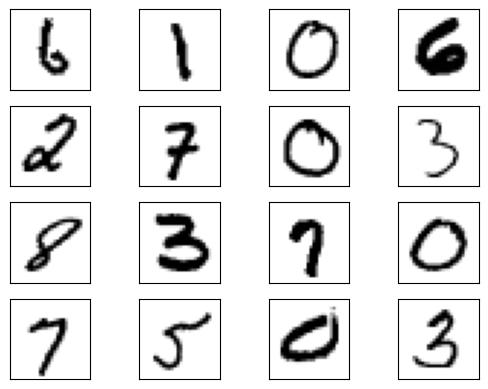

In [8]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

# Implementing the Discriminator and the Generator
In this case, the discriminator is an MLP neural network that receives a 28 × 28 pixel image and provides the probability of the image belonging to the real training data.

You can define the model with the following code:

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

To input the image coefficients into the MLP neural network, you vectorize them so that the neural network receives vectors with 784 coefficients.

The vectorization occurs in the first line of .forward(), as the call to x.view() converts the shape of the input tensor. In this case, the original shape of the input x is 32 × 1 × 28 × 28, where 32 is the batch size you’ve set up. After the conversion, the shape of x becomes 32 × 784, with each line representing the coefficients of an image of the training set.

To run the discriminator model using the GPU, you have to instantiate it and send it to the GPU with .to(). To use a GPU when there’s one available, you can send the model to the device object you created earlier:



In [9]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [10]:
discriminator = Discriminator().to(device=device)

Since the generator is going to generate more complex data, it’s necessary to increase the dimensions of the input from the latent space. In this case, the generator is going to be fed a 100-dimensional input and will provide an output with 784 coefficients, which will be organized in a 28 × 28 tensor representing an image.

Here’s the complete generator model code:

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

n line 12, you use the hyperbolic tangent function Tanh() as the activation of the output layer since the output coefficients should be in the interval from -1 to 1. In line 20, you instantiate the generator and send it to device to use the GPU if one is available.

Now that you have the models defined, you’ll train them using the training data.



# Training the Models
To train the models, you need to define the training parameters and optimizers like you did in the previous example:



In [12]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

To obtain a better result, you decrease the learning rate from the previous example. You also set the number of epochs to 50 to reduce the training time.

The training loop is very similar to the one you used in the previous example. In the highlighted lines, you send the training data to device to use the GPU if available:



In [13]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5625379681587219
Epoch: 0 Loss G.: 0.4809296131134033
Epoch: 1 Loss D.: 0.02367882989346981
Epoch: 1 Loss G.: 5.215425491333008
Epoch: 2 Loss D.: 0.010110095143318176
Epoch: 2 Loss G.: 5.632476806640625
Epoch: 3 Loss D.: 0.014878731220960617
Epoch: 3 Loss G.: 3.999220609664917
Epoch: 4 Loss D.: 0.15264926850795746
Epoch: 4 Loss G.: 4.751422882080078
Epoch: 5 Loss D.: 0.13093766570091248
Epoch: 5 Loss G.: 4.01731538772583
Epoch: 6 Loss D.: 0.2363031655550003
Epoch: 6 Loss G.: 2.492100954055786
Epoch: 7 Loss D.: 0.32227015495300293
Epoch: 7 Loss G.: 3.200115203857422
Epoch: 8 Loss D.: 0.23429343104362488
Epoch: 8 Loss G.: 2.3750367164611816
Epoch: 9 Loss D.: 0.3726489543914795
Epoch: 9 Loss G.: 2.6902518272399902
Epoch: 10 Loss D.: 0.2922993302345276
Epoch: 10 Loss G.: 2.2464258670806885
Epoch: 11 Loss D.: 0.2661551237106323
Epoch: 11 Loss G.: 1.626793384552002
Epoch: 12 Loss D.: 0.3734443783760071
Epoch: 12 Loss G.: 1.7812637090682983
Epoch: 13 Loss D.: 0.30919164419

Some of the tensors don’t need to be sent to the GPU explicitly with device. This is the case with generated_samples in line 11, which will already be sent to an available GPU since latent_space_samples and generator were sent to the GPU previously.

Since this example features more complex models, the training may take a bit more time. After it finishes, you can check the results by generating some samples of handwritten digits.

# Checking the Samples Generated by the GAN
To generate handwritten digits, you have to take some random samples from the latent space and feed them to the generator: 

In [14]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

To plot generated_samples, you need to move the data back to the CPU in case it’s running on the GPU. For that, you can simply call .cpu(). As you did previously, you also need to call .detach() before using Matplotlib to plot the data:

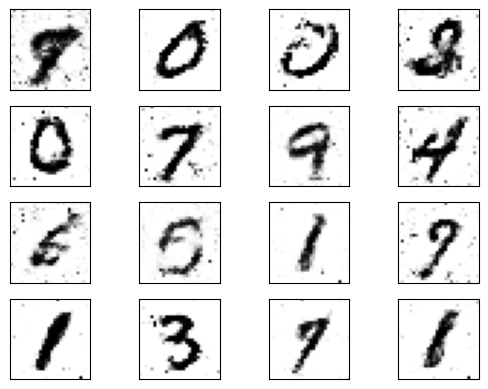

In [15]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

After fifty epochs of training, there are several generated digits that resemble the real ones. You can improve the results by considering more training epochs. As with the previous example, by using a fixed latent space samples tensor and feeding it to the generator at the end of each epoch during the training process, you can visualize the evolution of the training